In [1]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
from PIL import Image


In [2]:
import torch
import torch.nn as nn

# Attention Mechanism
class AttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super(AttentionBlock, self).__init__()
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // 8),
            nn.ReLU(),
            nn.Linear(in_channels // 8, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        attn = self.global_avg_pool(x).view(b, c)
        attn = self.fc(attn).view(b, c, 1, 1)
        return x * attn

# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.ReLU()
        )

        self.res_blocks = nn.Sequential(*[nn.Sequential(
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU()
        ) for _ in range(6)])

        self.attention = AttentionBlock(128)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.res_blocks(x)
        x = self.attention(x)
        x = self.decoder(x)
        return x


In [3]:
# Import PyTorch
import torch

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the generator model
generator = Generator().to(device)

# Load the trained weights
generator.load_state_dict(torch.load(r"C:\Users\plawa\miniProject\models\generator.pth", map_location=device))
generator.eval()  # Set to evaluation mode

print("Generator model loaded successfully!")


Generator model loaded successfully!


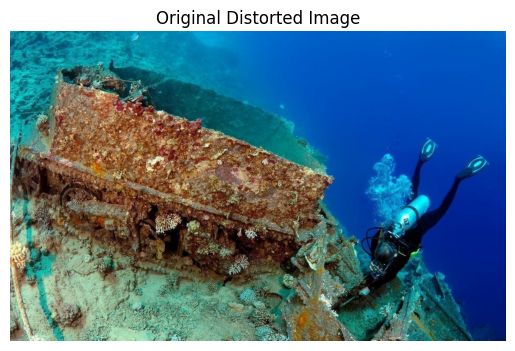

In [4]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Path to a test image (change this to an image from your dataset)
test_img_path = r"C:\Users\plawa\miniProject\data\UIEB\raw-890\2_img_.png"  # Change the filename if needed

# Load the image
img = Image.open(test_img_path).convert("RGB")

# Define the same transformations as in training
transform = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor()
])

# Apply the transformations
input_img = transform(img).unsqueeze(0).to(device)  # Add batch dimension

# Display the original image
plt.imshow(img)
plt.title("Original Distorted Image")
plt.axis("off")
plt.show()


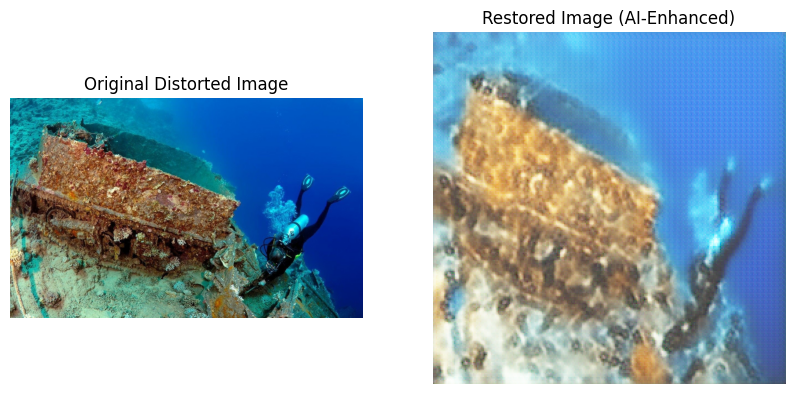

In [5]:
# Ensure the model is in evaluation mode
generator.eval()

# Pass the test image through the generator
with torch.no_grad():
    output_img = generator(input_img)

# Convert the output tensor to a NumPy array for visualization
output_img = output_img.squeeze().cpu().numpy().transpose(1, 2, 0)  # Convert to H x W x C format

# Clip values to be in the range [0,1]
output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min())

# Display the original and restored images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show original distorted image
axs[0].imshow(img)
axs[0].set_title("Original Distorted Image")
axs[0].axis("off")

# Show restored image
axs[1].imshow(output_img)
axs[1].set_title("Restored Image (AI-Enhanced)")
axs[1].axis("off")

plt.show()


In [9]:
# Convert output image to PIL format
output_pil = Image.fromarray((output_img * 255).astype("uint8"))  # Convert to 8-bit format

# Define save path (change filename as needed)
save_path = r"C:\Users\plawa\miniProject\output\restored_sample.jpg"

# Save the image
output_pil.save(save_path)

print(f"Restored image saved successfully at: {save_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\plawa\\miniProject\\output\\restored_sample.jpg'